# Week 2: Data Analysis

In this Notebook, we will cover the following in an explaratory data analysis approach:
- Missing Values

- Distributions of Values

- Visulization

Note: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. We will be using this library a lot throughout this week. If you are not familiar with this library, please check out [this tutorial.](https://www.geeksforgeeks.org/matplotlib-tutorial/)

In [2]:
# for Google Colab
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import os
import sys

path = '/content/drive/MyDrive/'
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive/
/content/drive/MyDrive


In [3]:
# import the necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# ignore all warnings
warnings.filterwarnings('ignore')

# to show plots inline with the notebook itself instead of popup windows
%matplotlib inline

In [4]:
# remove limitation in viewing pandas columns
pd.set_option('display.max_columns', None)

# set the project directory path
project_dir = os.getcwd()

### Loading the dataset

In [9]:
# dtypes = {
#     'pan':'object',
#     'merchant': 'object',
#     'category': 'object',
#     'transactionAmount': 'float',
#     'city':'object',
#     'state':'object',
#     'unix_time': 'int',
#     'mdlIsFraudTrx':'int',
#     'mdlIsFraudAcct':'int',
#     'is_train': 'bool',
#     'merchCountry': 'object',
#     'merchState': 'object',
#     'cardholderCountry': 'object',
#     'cardholderState': 'object',
#          }


# for SHK: load the train/test CSV files into separate DataFrames
# df_1 = pd.read_csv('/ptoan/fraud64/HBCU_2024/data_with_injections/train.csv', sep=',')
# df_2 = pd.read_csv('/ptoan/fraud64/HBCU_2024/data_with_injections/test_A.csv', sep=',')

# # for Google Colab
df_1 = pd.read_csv("/content/drive/My Drive/FICO Analytic Challenge/Data/train.csv")
df_2 = pd.read_csv("/content/drive/My Drive/FICO Analytic Challenge/Data/test_A.csv")

# Concatenate the DataFrames
df = pd.concat([df_1, df_2])

# # alternatively, for loading a single csv as a dataframe:
# df = pd.read_csv('/ptoan/fraud53/USCredit_v31/behnam/HBCU/data/final_data/test_C.csv', sep=',')

**df.columns** provides a way to access and view the names of all the columns in the DataFrame. This is useful for understanding the structure of the DataFrame or when performing operations that depend on knowing the column names. Refer to the Data Specification for more information about each column.

In [10]:
df.columns

Index(['pan', 'merchant', 'category', 'transactionAmount', 'first', 'last',
       'gender', 'street', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'mdlIsFraudTrx',
       'mdlIsFraudAcct', 'transactionDateTime', 'is_train', 'merchCountry',
       'merchState', 'cardholderCountry', 'cardholderState'],
      dtype='object')

The **head()** function in pandas is used to display the first few rows of a DataFrame. By default, it shows the first five rows, but you can specify the number of rows you want to view by passing an integer as an argument.

In [11]:
# display top 5 rows to verify that the dataset has loaded correctly
display(df.head())

,pan,merchant,category,transactionAmount,first,last,gender,street,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,mdlIsFraudTrx,mdlIsFraudAcct,transactionDateTime,is_train,merchCountry,merchState,cardholderCountry,cardholderState
0,0033864050176488B,"Stehr, Jewess and Schimmel",misc_net,35.83,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,362febb0060ce2d6a995a72a116e34f4,1350565945,40.289849,-92.676330,0,0,2020-01-01 17:12:25,1,US,Missouri,US,Iowa
1,0033864050176488B,Fritsch and Sons,health_fitness,1.89,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,de7d5f0356d41470cd02e719e2e0b196,1350568050,40.699982,-91.713680,0,0,2020-01-01 17:47:30,1,US,Iowa,US,Iowa
2,0033864050176488B,"Tromp, Kerluke and Glover",grocery_net,18.53,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,c9d194a3266cd20b23478dd8d2361ef9,1350529141,40.295853,-92.779702,0,0,2020-01-01 17:59:01,1,US,Missouri,US,Iowa
3,0033864050176488B,Homenick LLC,personal_care,90.24,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,e860a23fcbb2d46956a6f4f7b18cfe3f,1353168338,40.535509,-91.770945,0,0,2020-01-01 18:05:38,1,US,Missouri,US,Iowa
4,0033864050176488B,Mayert Group,shopping_pos,156.86,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,d3db2da4a5c741058ff57f61023e5353,1353168516,41.245006,-92.860950,0,0,2020-01-01 18:08:36,1,US,Iowa,US,Iowa


We need to convert the values in the datetime column of a pandas DataFrame to datetime objects. This is useful when you need to perform date and time operations, such as filtering, aggregating, or extracting specific date components (e.g., year, month, day, hour). This is what we do to tell pandas that the values in this column are DateTime values. The benefits of this conversion are:
* Date and Time Manipulation: Datetime objects allow for easy manipulation of dates and times.
* Filtering: Enables filtering based on specific time periods.
* Time Series Analysis: Essential for time series data analysis.
* Extracting Date Components: Easily extract components like year, month, day, etc.

In [12]:
# parse the datetime feature to datetime arguments
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

After concatenating two DataFrames in pandas, you might want to use *df.reset_index(drop=True, inplace=True)* to ensure that the index of the resulting DataFrame is properly ordered and doesn't contain duplicate or non-sequential values.

In [13]:
# reset the index
df.reset_index(drop=True, inplace=True)

Let's look at the first 5 rows again:

In [14]:
# show top 5 entries to make sure proper dataset loading
display(df.head())

,pan,merchant,category,transactionAmount,first,last,gender,street,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,mdlIsFraudTrx,mdlIsFraudAcct,transactionDateTime,is_train,merchCountry,merchState,cardholderCountry,cardholderState
0,0033864050176488B,"Stehr, Jewess and Schimmel",misc_net,35.83,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,362febb0060ce2d6a995a72a116e34f4,1350565945,40.289849,-92.676330,0,0,2020-01-01 17:12:25,1,US,Missouri,US,Iowa
1,0033864050176488B,Fritsch and Sons,health_fitness,1.89,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,de7d5f0356d41470cd02e719e2e0b196,1350568050,40.699982,-91.713680,0,0,2020-01-01 17:47:30,1,US,Iowa,US,Iowa
2,0033864050176488B,"Tromp, Kerluke and Glover",grocery_net,18.53,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,c9d194a3266cd20b23478dd8d2361ef9,1350529141,40.295853,-92.779702,0,0,2020-01-01 17:59:01,1,US,Missouri,US,Iowa
3,0033864050176488B,Homenick LLC,personal_care,90.24,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,e860a23fcbb2d46956a6f4f7b18cfe3f,1353168338,40.535509,-91.770945,0,0,2020-01-01 18:05:38,1,US,Missouri,US,Iowa
4,0033864050176488B,Mayert Group,shopping_pos,156.86,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,d3db2da4a5c741058ff57f61023e5353,1353168516,41.245006,-92.860950,0,0,2020-01-01 18:08:36,1,US,Iowa,US,Iowa


The **info()** function in pandas provides a concise summary of a DataFrame. It is useful for quickly understanding the structure and contents of your DataFrame. Here is what df.info() displays:

* Class Type: The type of the object
* RangeIndex: The range of the DataFrame's index.
* Columns: A list of all column names.
* Non-Null Count: The number of non-null (non-missing) entries in each column.
* Dtype: The data type of each column (e.g., int64, float64, object).
* Memory Usage: The memory usage of the DataFrame.

In [15]:
# check the data type of each feature present in our dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611480 entries, 0 to 1611479
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   pan                  1611480 non-null  object        
 1   merchant             1611480 non-null  object        
 2   category             1611480 non-null  object        
 3   transactionAmount    1611480 non-null  float64       
 4   first                1611480 non-null  object        
 5   last                 1611480 non-null  object        
 6   gender               1611480 non-null  object        
 7   street               1611480 non-null  object        
 8   zip                  1611480 non-null  int64         
 9   lat                  1611480 non-null  float64       
 10  long                 1611480 non-null  float64       
 11  city_pop             1611480 non-null  int64         
 12  job                  1611480 non-null  object        
 1

None

## Missing values
Missing values are important and should be analyzed because:
 - They can indicate errors or inconsistencies in the data collection process. By identifying and addressing missing values, we can ensure the integrity and reliability of your dataset.
 - They can distort statistical analyses and machine learning models and introduce bias and error in our analysis.

the **isnull()** function in Pandas is used to detect missing values.

In [16]:
df.isnull().sum()

,0
pan,0
merchant,0
category,0
transactionAmount,0
first,0
last,0
gender,0
street,0
zip,0
lat,0


sometimes columns are not empty but populated with space characters. In that case, they will not show up as **null** in **isnull()** function, so let's check for space characters in our dataset.

In [17]:
# function to check each element in a column for being a space character or an empty string.
def has_space_or_empty(column):
    return column.apply(lambda x: isinstance(x, str) and (x.isspace() or x == ''))

# apply the function to object columns only
space_character_columns = df.apply(has_space_or_empty)

# identify columns with any space characters or empty strings
columns_with_space = space_character_columns.any()
print("Columns with space characters or empty strings:")
print(columns_with_space)

Columns with space characters or empty strings:
pan                    False
merchant               False
category               False
transactionAmount      False
first                  False
last                   False
gender                 False
street                 False
zip                    False
lat                    False
long                   False
city_pop               False
job                    False
dob                    False
trans_num              False
unix_time              False
merch_lat              False
merch_long             False
mdlIsFraudTrx          False
mdlIsFraudAcct         False
transactionDateTime    False
is_train               False
merchCountry           False
merchState             False
cardholderCountry      False
cardholderState        False
dtype: bool


If space characters exist, we can get rid of them using below command.

In [ ]:
# df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
# print("Missing values after handling space characters:")
# print(df.isnull().sum())

There are several ways we can handle misssing values:
 - Dropping: If the number of missing values in a row is relatively small compared to the total dataset and dropping those rows does not significantly reduce the dataset's representativeness, you can choose to drop the rows containing missing values. There are many things to consider before droping a row or column of data. For example, we should not drop significant amount of data, data related to important features, and when there are patterns in the missing data.

 - Imputation: There are many ways you can impute a missing value. For example, you can replace missing values with the mean, median, or mode of the column. A more scientific approach would be to use statistical models to predict missing values based on other variables.

 - Forward/Backward fill: For ordered data you can choose to fill missing values with the last known value (forward fill) or the next known value (backward fill).

 - Deduction: You can sometimes deduce a missing value based on other fields. For example, you could find cardholderCountry from currencyCode if it was provided.

The **unique()** function in pandas is used to find and return the unique values from a specific column or Series in a DataFrame. This is useful for identifying the distinct values in a dataset, which helps in understanding the data better and preparing it for analysis.

In [18]:
unique_values = df.apply(pd.unique)
print("Unique values for each column:")
display(unique_values) # for all columns

# # to view unique values for a specific column:
display(unique_values['category'])

Unique values for each column:


,0
pan,"[0033864050176488B, 0050735227021800B, 0132293..."
merchant,"[Stehr, Jewess and Schimmel, Fritsch and Sons,..."
category,"[misc_net, health_fitness, grocery_net, person..."
transactionAmount,"[35.83, 1.89, 18.53, 90.24, 156.86, 69.34, 136..."
first,"[Meredith, Savannah, Ashlee, Jennifer, Monica,..."
last,"[Campbell, Lewis, Long, Bishop, Lane, Caldwell..."
gender,"[F, M]"
street,"[043 Hanson Turnpike, 537 Walker Freeway, 7633..."
zip,"[52563, 14120, 14532, 77026, 4226, 48193, 9553..."
lat,"[41.1826, 43.0498, 42.9582, 29.7972, 44.6084, ..."


array(['misc_net', 'health_fitness', 'grocery_net', 'personal_care',
       'shopping_pos', 'entertainment', 'misc_pos', 'gas_transport',
       'grocery_pos', 'food_dining', 'home', 'kids_pets', 'travel',
       'shopping_net'], dtype=object)

## Histograms, Distributions, and visualizations
It is useful to look at distributions and histograms of data as they provide valuable insights into the characteristics of a dataset, making them essential tools in exploratory data analysis. Here's why examining histograms and distributions is useful:

- Understanding Data Structure: Histograms visually represent the distribution of values in a dataset by grouping them into bins. By examining the shape, central tendency, and spread of the histogram, you can gain a better understanding of structure of the data.

- Identifying Patterns and Trends: Histograms help identify patterns, trends, and anomalies in the data. For example, a unimodal distribution indicates a single peak, while a bimodal distribution suggests two distinct peaks. Deviations from expected patterns may reveal interesting insights or potential data issues.

- Assessing Skewness and Kurtosis: Skewness and kurtosis are measures of asymmetry and peakedness in the distribution, respectively. Histograms allow you to visually assess these characteristics, which can inform decisions about data transformation or modeling assumptions.

- Detecting Outliers: Outliers are data points that deviate significantly from the rest of the dataset. Histograms make it easy to identify potential outliers as they appear as data points located far from the main distribution or peaks.

### Mean and Standard Deviation
The mean and standard deviation help describe data. Mean shows the average value of the data and standard deviation measures how spread out the data is around the mean, showing the variability. These two measures are essential for data preprocessing steps like standardization, which adjusts features to have a mean of zero and a standard deviation of one (more on this in future notebooks).

The **describe()** function in Pandas outputs descriptive statistics that summarize the central tendency, dispersion, and shape of a dataframe's distribution of numerical data.

Key Features of describe():
* Count: The number of non-null entries.
* Mean: The average value.
* Standard Deviation (std): The spread of the values.
* Min: The minimum value.
* 25% (1st Quartile): The value below which 25% of the data falls.
* 50% (Median): The middle value of the dataset.
* 75% (3rd Quartile): The value below which 75% of the data falls.
* Max: The maximum value.

In [19]:
# getting fundamental statistics:
# for our dataset, it only makes sense to look at the descriptive statistics for the transactionAmount column
df['transactionAmount'].describe()

,transactionAmount
count,1.611480e+06
mean,8.495727e+01
std,2.706782e+02
min,1.000000e+00
25%,9.860000e+00
50%,4.862000e+01
75%,8.646000e+01
max,1.252807e+05


Let's use visualization techniques to take a closer look at the TransactionDateTime column. Our goal is to extract the hour of the day from the TransactionDateTime and use histograms to display its distribution.

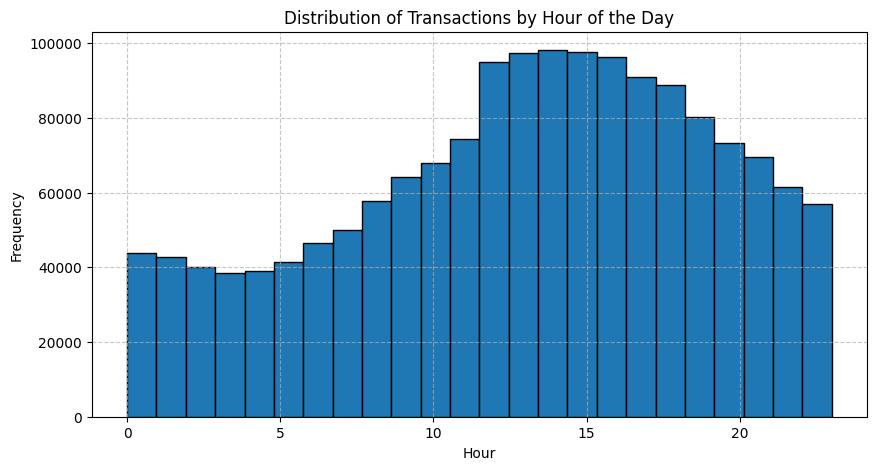

In [20]:
# create a column for time and append it to the end of dataframe
df['time'] = df['transactionDateTime'].dt.time # extract time component from a datetime column

plt.figure(figsize=(10, 5))
df['time'].apply(lambda x: x.hour).hist(bins=24, edgecolor='black') # create a histogram that visualizes the distribution of hours from the time column
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Distribution of Transactions by Hour of the Day')
plt.grid(True, linestyle='--', alpha=0.7) # a grid with dashed lines to improve readability
plt.show()

Our ultimate goal in this project is to detect fraudulent transactions. To achieve this, we need to identify columns that can help us distinguish between fraud and non-fraud transactions, focusing on those with different distributions for each. From now on, we will analyze all measures, such as histograms and distributions, with this perspective. We will evaluate data for both fraudulent and non-fraudulent transactions to gain insights into how our dataset's columns/features correlate with these categories.

Let's create two DataFrames to separate frauds and non-frauds, and use the  **describe()** function to gain insights into each category:

In [21]:
# create a fraud dataframe using the definitions
fraud_df = df[df['mdlIsFraudTrx'] == 1]
# create a non-fraud dataframe using the definitions
nonfraud_df = df[df['mdlIsFraudTrx'] == 0]

# display basic statistics for the Fraud/NonFraud dataframes
display("Descriptive Statistics for Fraud DataFrame:", fraud_df['transactionAmount'].describe())
display("Descriptive Statistics for NonFraud DataFrame:", nonfraud_df['transactionAmount'].describe())

'Descriptive Statistics for Fraud DataFrame:'

,transactionAmount
count,9499.000000
mean,514.207093
std,414.605162
min,1.060000
25%,49.810000
50%,367.510000
75%,882.010000
max,3599.190000


'Descriptive Statistics for NonFraud DataFrame:'

,transactionAmount
count,1.601981e+06
mean,8.241202e+01
std,2.675499e+02
min,1.000000e+00
25%,9.820000e+00
50%,4.840000e+01
75%,8.582000e+01
max,1.252807e+05


### Fraud Rate
Fraud rate is calculated as the ratio of fraudulent transactions to the total number of transactions. Knowledge of the fraud rate helps in developing strategies for fraud   detection. It helps in identifying vulnerable areas and implementing targeted measures.
#### Basis Points
In the context of fraud rates, basis points can be used to express small changes or differences in fraud rates in a precise manner. One basis point is equal to one-hundredth of one percent, or 0.01%. Thus, 100 basis points are equal to 1%. For example, if the fraud rate of transactions increased from 1.00% to 1.05%, this can be described as an increase of 5 basis points.

In [22]:
# account level fraud rate calculation
account_level_fraud = df[df['mdlIsFraudAcct'] == 1]['pan'].nunique() # number of fraud accounts
account_level_nonfraud = df[df['mdlIsFraudAcct'] == 0]['pan'].nunique() # number of nonfraud accounts
account_level_fr = account_level_fraud/(account_level_fraud + account_level_nonfraud) # account-level fraud rate

print("Fraud Rate Calculations:")
print(f"Account-Level Fraud Rate = account-level frauds ÷ (account-level frauds + account-level nonfrauds) = {account_level_fraud} ÷ ({account_level_fraud} + {account_level_nonfraud}) = {account_level_fr:.4f}")

# transaction level fraud rate calculation
transaction_level_fraud = len(fraud_df) # number of fraudulent transactions
transaction_level_nonfraud = len(nonfraud_df) # number of nonfraudulent transactions
transaction_level_fr = transaction_level_fraud/(transaction_level_fraud + transaction_level_nonfraud) # transaction-level fraud rate

print(f"Transaction-Level Fraud Rate = transaction-level frauds ÷ (transaction-level frauds + transaction-level nonfrauds) = {transaction_level_fraud} ÷ ({transaction_level_fraud} + {transaction_level_nonfraud}) = {transaction_level_fr:.4f}")

Fraud Rate Calculations:
Account-Level Fraud Rate = account-level frauds ÷ (account-level frauds + account-level nonfrauds) = 877 ÷ (877 + 655) = 0.5725
Transaction-Level Fraud Rate = transaction-level frauds ÷ (transaction-level frauds + transaction-level nonfrauds) = 9499 ÷ (9499 + 1601981) = 0.0059


It's important to note that the Fraud Rate in real data is different from what we see in the synthetic data used for this challenge. The fraud rate in real data may be:
- Transaction-level fraud rate: 0.1%
- Account-level fraud rate: 0.5%

Additionally, to create an effective fraud solution, we downsample non-frauds to strengthen the signal in our analytics.

## 1. Hour of Day Histograms
Now, let us look at the frequency of transactions versus hour of day for fraud and nonfraud categories.

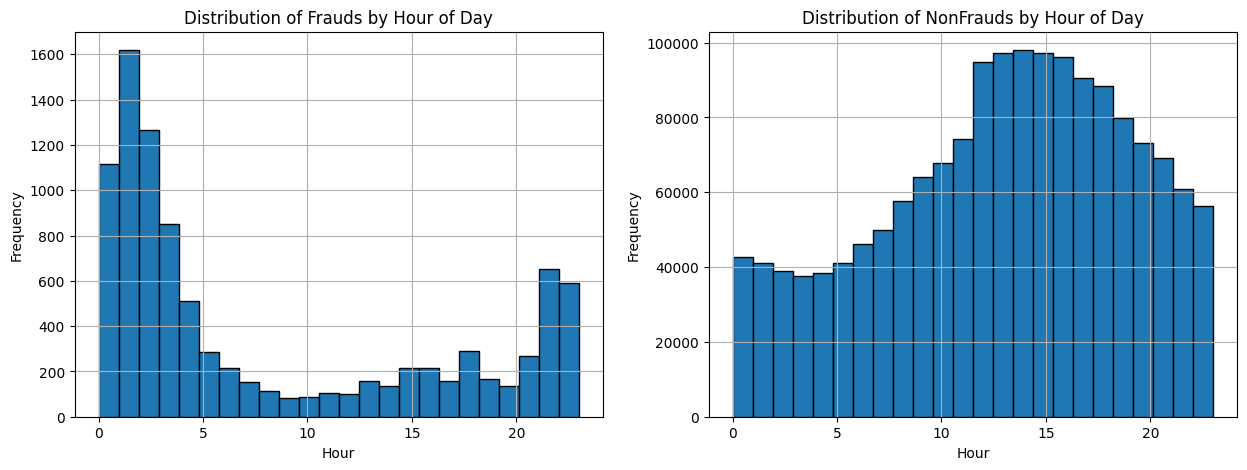

In [23]:
# create two plots
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

# plot1: calculating distributions for frauds
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
fraud_df['time'].apply(lambda x: x.hour).hist(bins=24, edgecolor='black')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Distribution of Frauds by Hour of Day')

# plot2: calculating distributions for nonfrauds
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
nonfraud_df['time'].apply(lambda x: x.hour).hist(bins=24, edgecolor='black')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Distribution of NonFrauds by Hour of Day')

# show the plots
plt.show()

These histograms show two different distributions for frauds and nonfrauds versus Hour of Day. This is great news! We can leverage this difference in our fraud detection straategies.

## 2. Card Present vs. Card Not Present

- **Card-Present (CP) transactions:** These occur when the physical card is used, such as at a point of sale (POS) terminal. They typically involve additional security measures like chip-and-PIN or contactless authentication, making them generally less susceptible to certain types of fraud.

- **Card-Not-Present (CNP) transactions:** As the name suggests, these occur when the card is not physically present, such as online purchases or over-the-phone transactions. CNP transactions are more prone to fraud because they lack the physical security features of CP transactions.

Distinguishing between CP and CNP transactions is crucial for fraud detection due to the significant differences in the nature, risk, and patterns of these transactions. We use the *category* column to separate CP/CNP in our dataset:
* 'categories' that end with *net* are considered CNP and the rest are classified as CP.
*  Let's get a breakdown of categories for frauds and non-frauds using **value_counts()** function.

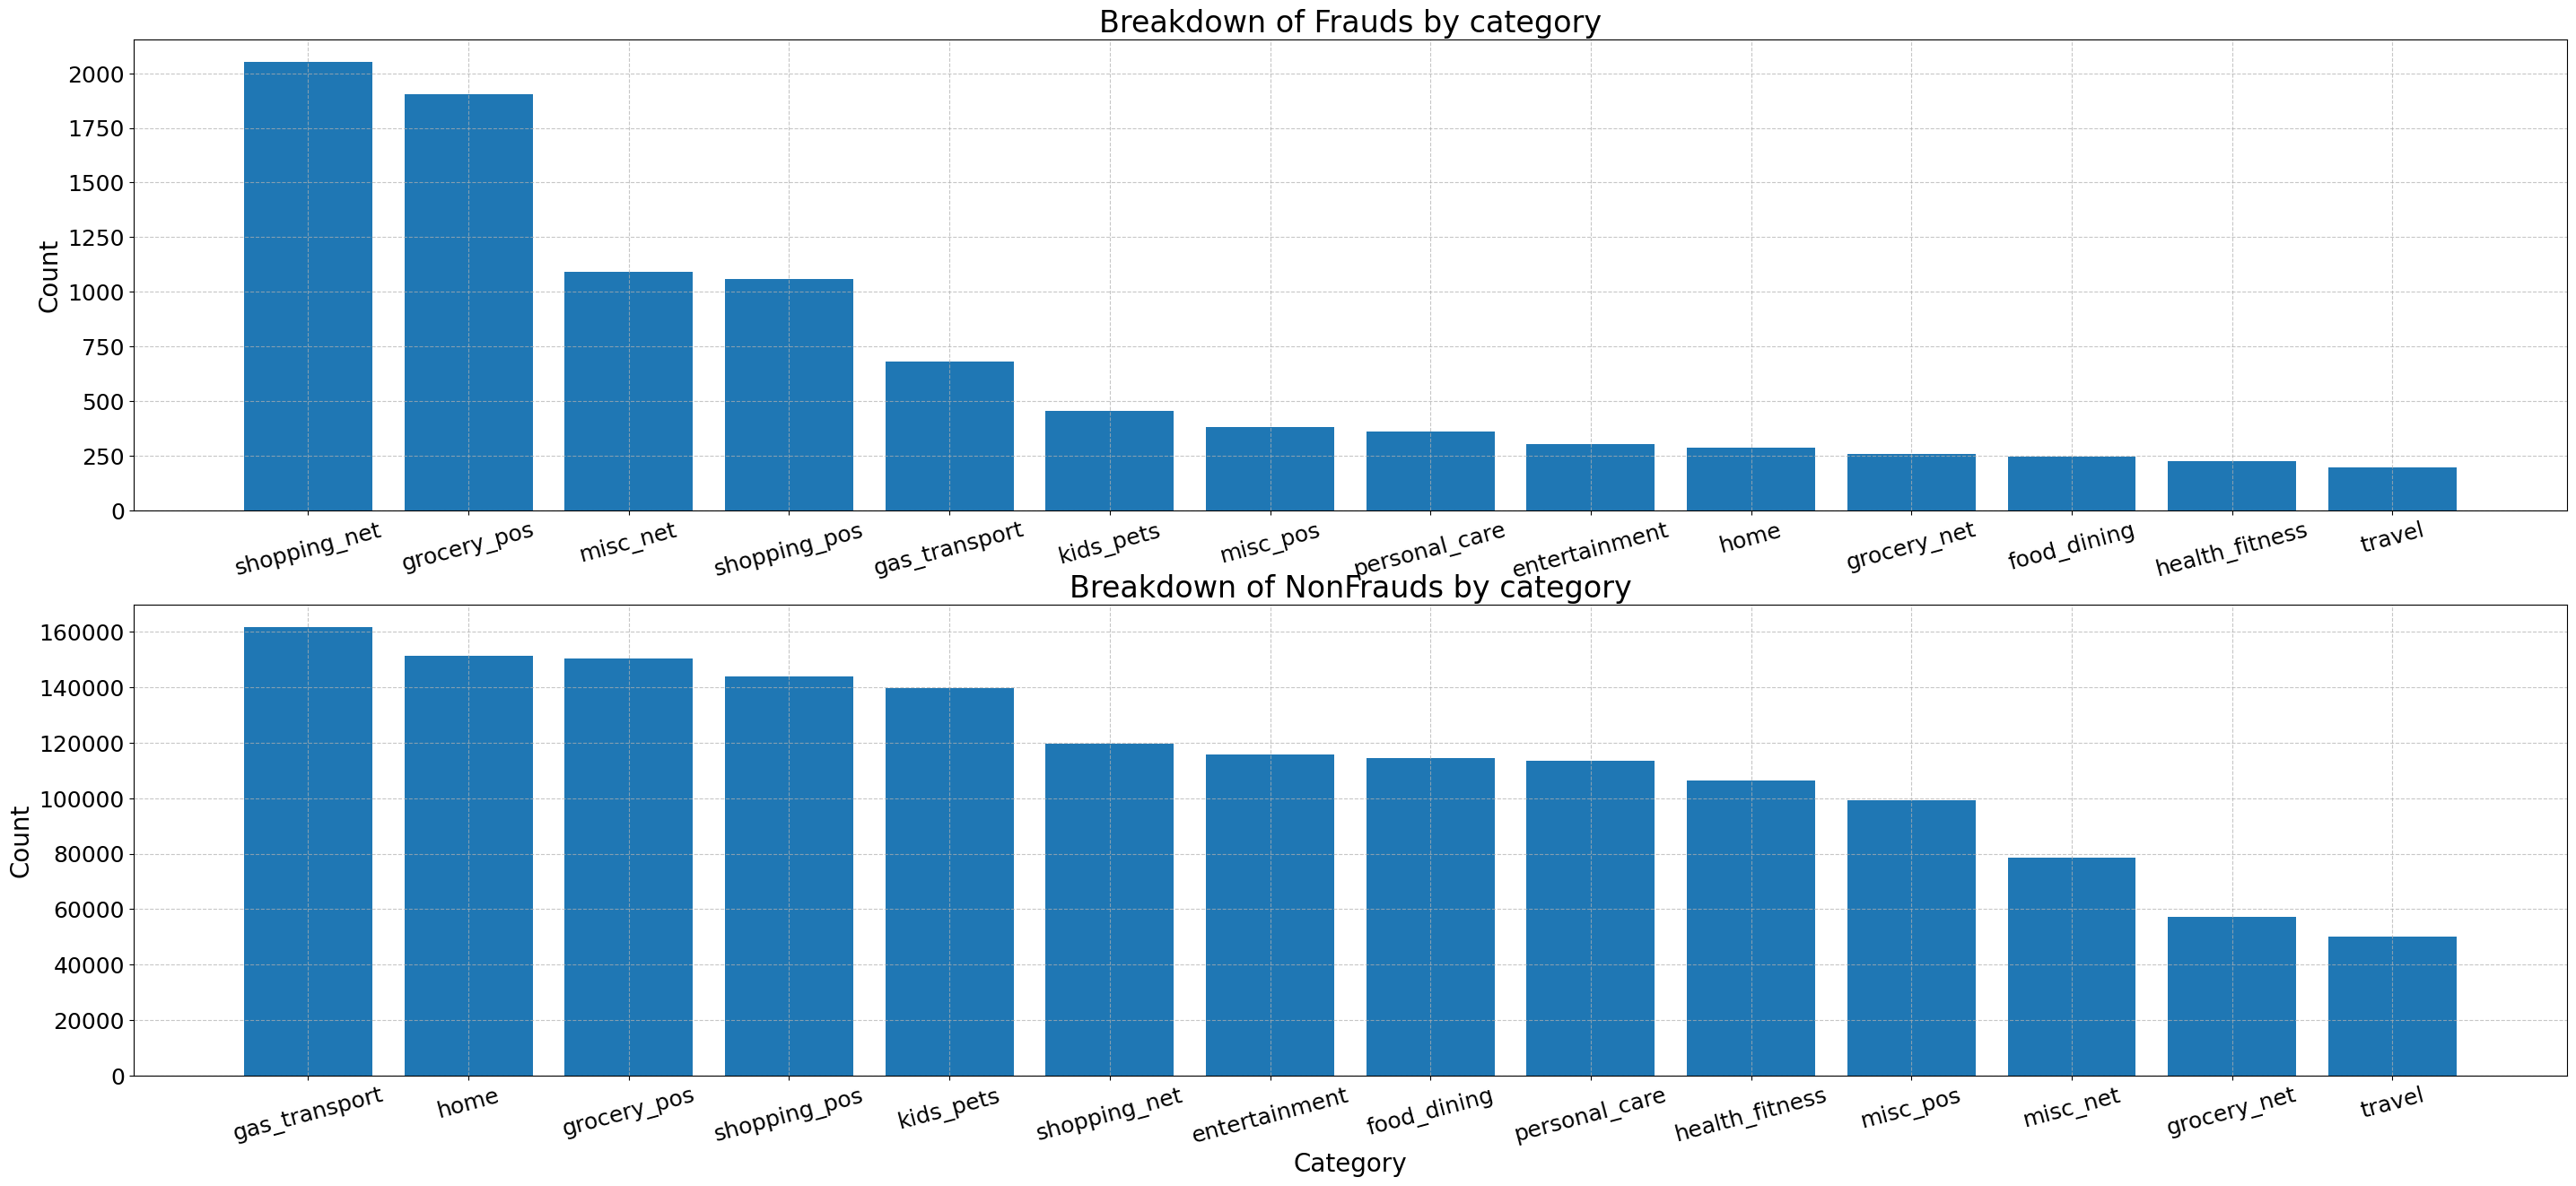

In [24]:
# create two plots
plt.figure(figsize=(35, 15))  # Adjust the figure size as needed

# plot1: calculating counts per category for frauds
plt.subplot(2, 1, 1)  # 2 row, 1 columns, subplot 1
fraud_counts_per_category=fraud_df['category'].value_counts()
# print('Frauds' ,fraud_counts_per_category) # uncomment if you want to see actual numbers per category
plt.bar(fraud_counts_per_category.index, fraud_counts_per_category.values)
plt.grid(True, linestyle='--', alpha=0.7) # a grid with dashed lines to improve readability
plt.title('Breakdown of Frauds by category', fontsize=24)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=18, rotation=15)
plt.yticks(fontsize=18)

# plot2: calculating counts per category for nonfrauds
plt.subplot(2, 1, 2)  # 2 row, 1 columns, subplot 2
nonfraud_counts_per_category=nonfraud_df['category'].value_counts()
# print('NonFrauds' ,nonfraud_counts_per_category) # uncomment if you want to see actual numbers per category
plt.bar(nonfraud_counts_per_category.index, nonfraud_counts_per_category.values)
plt.grid(True, linestyle='--', alpha=0.7) # a grid with dashed lines to improve readability
plt.title('Breakdown of NonFrauds by category', fontsize=24)
plt.xlabel('Category', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=18, rotation=15)
plt.yticks(fontsize=18)

# Show the plots
plt.show()

Now, let's group them into CP and CNP using "net":

CNP = 259037
CP = 1352443
ALL = 1611480


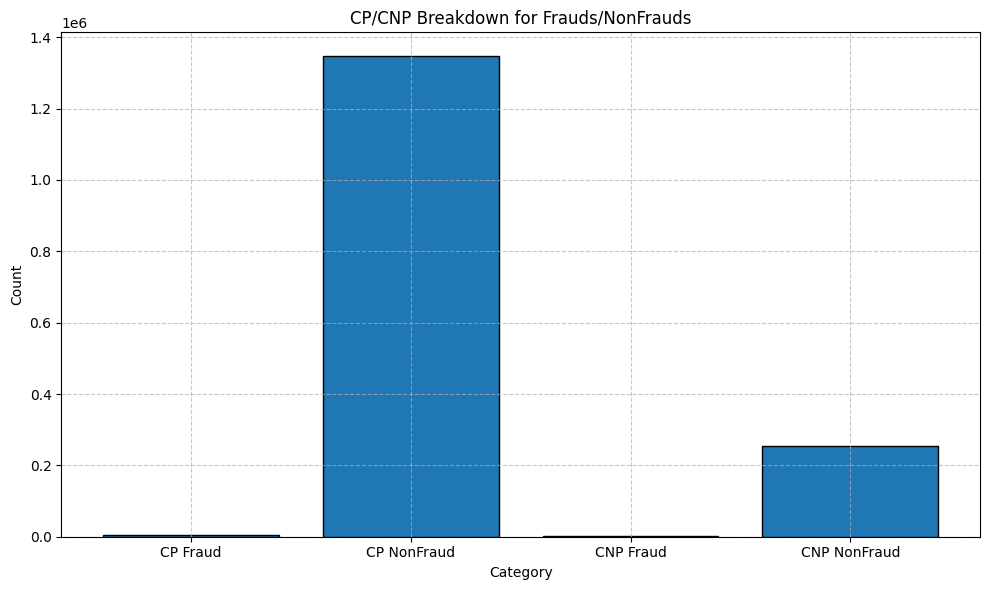

In [25]:
# calculate CP/CNP frauds
cnp_categories = ['shopping_net', 'grocery_net', 'misc_net']
cnp_fraud = sum(fraud_counts_per_category.get(category, 0) for category in cnp_categories)
cp_fraud = fraud_counts_per_category.sum() - cnp_fraud

# calculate CP/CNP nonfrauds
cnp_nonfraud = sum(nonfraud_counts_per_category.get(category, 0) for category in cnp_categories)
cp_nonfraud = nonfraud_counts_per_category.sum() - cnp_nonfraud

# create barplot
x = ['CP Fraud', 'CP NonFraud', 'CNP Fraud', 'CNP NonFraud']
y = [cp_fraud, cp_nonfraud, cnp_fraud, cnp_nonfraud]

plt.figure(figsize=(10, 6))
plt.bar(x, y, edgecolor='black')
plt.grid(True, linestyle='--', alpha=0.7)  # add grid with dashed lines for better readability
plt.title('CP/CNP Breakdown for Frauds/NonFrauds')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()

# print statistics
total_cnp = cnp_fraud + cnp_nonfraud
total_cp = cp_fraud + cp_nonfraud
total_all = total_cnp + total_cp

print(f"CNP = {total_cnp}")
print(f"CP = {total_cp}")
print(f"ALL = {total_all}")

plt.show()

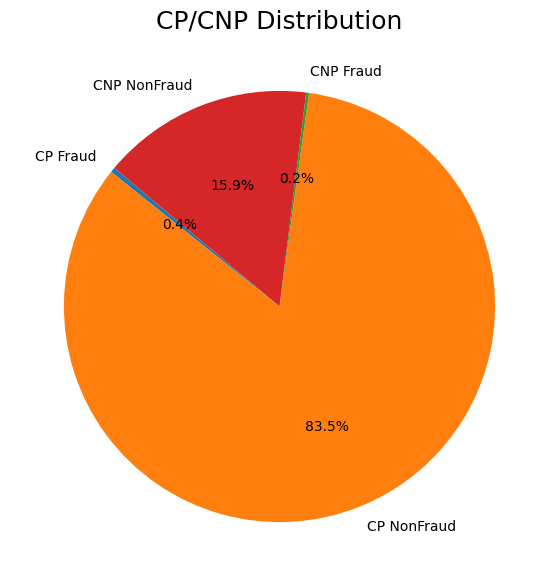

In [26]:
# pie chart showing the same data:
plt.figure(figsize=(10, 7))
plt.pie(y, labels=x, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10}) # the autopct parameter formats the numerical values displayed on the pie wedges
plt.title('CP/CNP Distribution', fontsize=18)
plt.show()

A key statistic from this analysis is the frauds rate within the CP and CNP subpopulations. This insight will be valuable during the later stages of model development.

In [27]:
# fraud rate calculation
fr_cnp = cnp_fraud / (cnp_fraud + cnp_nonfraud)  # CNP
fr_cp = cp_fraud / (cp_fraud + cp_nonfraud)  # CP

print("Fraud Rate Calculations:")
print(f"CNP Fraud Rate = CNP fraud ÷ (CNP fraud + CNP nonfraud) = {cnp_fraud} ÷ ({cnp_fraud} + {cnp_nonfraud}) = {fr_cnp:.4f}")
print(f"CP Fraud Rate = CP fraud ÷ (CP fraud + CP nonfraud) = {cp_fraud} ÷ ({cp_fraud} + {cp_nonfraud}) = {fr_cp:.4f}")

Fraud Rate Calculations:
CNP Fraud Rate = CNP fraud ÷ (CNP fraud + CNP nonfraud) = 3403 ÷ (3403 + 255634) = 0.0131
CP Fraud Rate = CP fraud ÷ (CP fraud + CP nonfraud) = 6096 ÷ (6096 + 1346347) = 0.0045


So, we observe that the fraud rate is higher for the CNP subpopulation. This aligns with our initial assumption that CNP transactions, lacking certain security measures, are more susceptible to fraud. Therefore, we can utilize this feature (indicating whether a transaction is CP or CNP) to emphasize if a transaction is CNP. This can help us capture more of the CNP frauds and we know:

In [28]:
print(f"We have {cnp_fraud} CNP frauds which is {100*cnp_fraud/(cnp_fraud+cp_fraud):.2f}% of total frauds")

We have 3403 CNP frauds which is 35.82% of total frauds


## 3. Cross-border vs Domestic
- **Cross-border transactions:** These tend to have higher fraud risk due to less stringent security measures, differences in regulatory environments, and the complexity of international verification.

- **Domestic transactions:** These generally have lower fraud risk as banks and payment processors can more easily verify the authenticity of the transaction within the same country.

We distinguish domestic transactions from cross-border transactions using the cardholderCountry and merchCountry fields. If the cardholderCountry and merchCountry match for a given transaction, it is classified as a domestic transaction. Otherwise, it is classified as a cross-border transaction.
Let's create a column called "is_international" to differentiate between cross-border and domestic transactions. This column will have binary values: 1 for cross-border and 0 for domestic.

In [29]:
# define a function to assign 0 to domestic transactions and 1 to cross-border
df['is_international'] = (df['cardholderCountry'] != df['merchCountry']).astype(int) # defining cross-border
fraud_df['is_international'] = (fraud_df['cardholderCountry'] != fraud_df['merchCountry']).astype(int)
nonfraud_df['is_international'] = (nonfraud_df['cardholderCountry'] != nonfraud_df['merchCountry']).astype(int)

fraud_df.head()

# Display some cross-border transactions
# display(fraud_df[fraud_df['is_international'] == 1].head(3))

,pan,merchant,category,transactionAmount,first,last,gender,street,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,mdlIsFraudTrx,mdlIsFraudAcct,transactionDateTime,is_train,merchCountry,merchState,cardholderCountry,cardholderState,time,is_international
2913,0050735227021800B,Ruecker-Mayert,kids_pets,18.52,Savannah,Lewis,F,537 Walker Freeway,14120,43.0498,-78.851,45100,Ambulance person,1993-10-25,75b3d431ddd50969ae2cc0e975df8d1f,1333494726,42.288275,-79.432909,1,1,2020-09-03 01:12:06,1,US,New York,US,New York,01:12:06,0
2914,0050735227021800B,Botsford and Sons,home,269.86,Savannah,Lewis,F,537 Walker Freeway,14120,43.0498,-78.851,45100,Ambulance person,1993-10-25,eeb151114f32c838291e070d98224b57,1333494742,43.692127,-78.868035,1,1,2020-09-03 01:12:22,1,CA,Ontario,US,New York,01:12:22,1
2915,0050735227021800B,"Schultz, Simonis and Little",grocery_pos,369.14,Savannah,Lewis,F,537 Walker Freeway,14120,43.0498,-78.851,45100,Ambulance person,1993-10-25,3fb33688e42763e3edaf292d3ab9dd2d,1333421494,43.520471,-78.438739,1,1,2020-09-03 01:51:34,1,US,New York,US,New York,01:51:34,0
2916,0050735227021800B,Doyle Ltd,grocery_pos,358.55,Savannah,Lewis,F,537 Walker Freeway,14120,43.0498,-78.851,45100,Ambulance person,1993-10-25,a71253517561cfa4fa8dcc85961c7aee,1333499436,43.370699,-78.464414,1,1,2020-09-04 01:30:36,1,US,New York,US,New York,01:30:36,0
2917,0050735227021800B,"Little, Gutmann and Lynch",shopping_net,791.92,Savannah,Lewis,F,537 Walker Freeway,14120,43.0498,-78.851,45100,Ambulance person,1993-10-25,9fdd16ef82e1f80a34db73d0147dea4b,1333508159,43.359533,-79.757054,1,1,2020-09-04 02:55:59,1,CA,Ontario,US,New York,02:55:59,1


This is where we stop for this week!
Please note that we added two columns in this week in "time" and "is_international". We will need the is_international column in the next weeks as well, so let's drop the "time" column and then save our dataframe for the following weeks.

In [30]:
# # drop the 'time' column
# df.drop(columns=['time'], inplace=True)

# # save to csv
# df.to_csv('/content/drive/My Drive/FICO Analytic Challenge/Week_02/train_testA_week02.csv', index=False)

## Exercises & Challenges
#### Exercise  
1.	Create histograms that show the counts by merchCountry for frauds and non-frauds (hint: use value_counts() function)
*	Calculate fraud rates for each merchCountry.
2. Analyze cross-border vs. domestic transactions.
*	Use a pie plot to visualize the fraud/non-fraud counts within each sub-population (cross-border vs. domestic).
*	Calculate transaction-level fraud rates in cross-border and domestic sub-populations.
*	Analyze and explain the differences in fraud rates.
#### Challenge: Explore Additional Predictive Features
*	Examine the existing data fields and brainstorm other features or subpopulations that could be predictive of fraud.